## Topics covered in this notebook:
1. What is Linear Regression.
2. Simple 1D Linear Regression.
3. Quality of Fit - R-Squared.
4. Multiple Linear Regression.
5. Probabilistic interpretation of the squared error.
6. L2 Regularization or Ridge Regression.
7. Gradient Descent.
8. L1 Regularization or Lasso.
9. L1 vs. L2 Regularization.
10. References.

## 1. Linear Regression

Consider a set of questions:
1. How to predict future stock price?
2. How to predict a rating of a movie?
3. How many followers will I get on twitter?
4. How can you predict a price of a house?

What does all these questions have in common?
1. **Outputs**. More specifically continous outputs (price of a house, # of followers etc.). Let's call this **'Y'** or **'y'**
2. Predicting continuous outputs is called **regression**
  

What do I need to predict outputs?
1. **Features** or Inputs, Let's call this **'X'**.
2. **Training examples**, many X's for which Y's are known.
3. A **model**, a function that represents the relationship between X & Y.
4. A **loss** or **cost** or **objective** function that tells us how our model represents the training examples.
5. **Optimization**, a way we can find the model parameters that minimizes the cost function.


## 2. Simple 1D Linear Regression

So let's re-state our problem in more general terms:
1. We are given a set of points: {(x1,y1),(x2,y2),....(xn,yn)}
2. We plot them in a 2D chart.
3. We find the line of best fit.


In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.linspace(0,10,50)
Y = 2*X + np.random.normal(0,1,50)

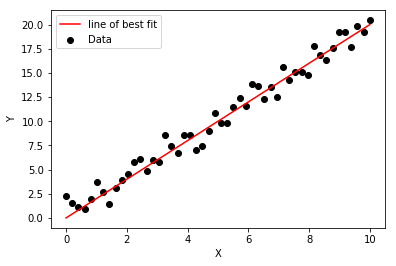

In [4]:
plt.scatter(X,Y,c = 'black',label = 'Data')
plt.plot(X,2*X,c = 'red',label = 'line of best fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Our line of best fit is defined as:
\begin{equation}
 \large \hat y_i = ax_i+ b 
\end{equation}

This is our **model**. <br>

What can we do to make sure $\large y_i$ is closer to $\large \hat y_i$

Can we do this? <br>

\begin{equation}
\large Error = \Sigma (\large y_i - \large \hat y_i)
\end{equation}

No. If the error for a point is -5 and +5 for the other the overall error is zero. However clearly that is not the case.<br>
What we want is this:
1. For any target != predictions, a +ve contribution to the error.
2. Standard way is to square of difference.
3. Called the "sum of the squared errors".

\begin{equation}
\large Error (E) = \Sigma (\large y_i - \large \hat y_i)^2
\end{equation}

Now that we have error we have to minimize it. How do we do that?<br> Take derivative & set it to zero! <br>

Substitute equation (1) in (3):

\begin{equation}
\large E = \Sigma (\large y_i - \large ax_i- b)^2
\end{equation}
<br>

We need to minimize E w.r.t a & b. Hence we need to take partial derivative.<br>

Derivative of above equation w.r.t a & b:

\begin{align}
\large \frac{\partial E}{\partial a} &= \Sigma \,2\, (\large y_i - \large ax_i- b)(-x_i) \\
\large \frac{\partial E}{\partial b} &= \Sigma \,2\, (\large y_i - \large ax_i- b)
\end{align}
<br>

Set that to zero: <br>

\begin{align}
\large a\,\Sigma \large x_i^2 + \large b\,\Sigma \large x_i &= \Sigma \,\large x_i\,\large y_i \\
\large a\,\Sigma \large x_i + \large b\,\large N &= \Sigma \,\large y_i \\
\end{align}
<br>

Solve those 2 equations simultaneously:

\begin{align}
\large a\, &= \frac{N\,\large\Sigma \,\large x_i\,\large y_i - \Sigma \,\large x_i\,\Sigma \,\large y_i}{N\, \large\Sigma \large x_i^2 - (\Sigma \large x_i)^2} \\
\large b\, &= \frac{N\,\large\Sigma \,\large x_i\,\large y_i^2 - \Sigma \,\large x_i\,\Sigma \,\large x_i \large y_i}{N\, \large\Sigma \large x_i^2 - (\Sigma \large x_i)^2} \\
\end{align}

<br>

Simplify it further is diving the above equations by $N^2$ and utilize the defitions of mean:
\begin{align}
\large a\, &= \frac{\overline{\large xy} - \overline{\large x}\,\overline{\large y}}{\overline{\large x^2} - \overline{\large x}^2}\\
\\
\large b\, &= \frac{\overline{\large y}\, \overline{\large x^2}  - \overline{\large x}\,\overline{\large xy}}{\overline{\large x^2} - \overline{\large x}^2}\\
\end{align}

where,

\begin{align}
\large \overline{x}\, &= \frac{1}{N} \,\large \Sigma \,\large x_i \\
\large \overline{xy}\, &= \frac{1}{N} \,\large \Sigma \,\large x_i\,y_i \\
\end{align}

## 3. Quality of Fit: R-Sq

\begin{equation}
\large R^2 \, = 1 \, - \frac{SS_{\text{res}}}{SS_{\text{tot}}} \\
\end{equation}

where
\begin{align}
\large SS_{\text{res}}\, &=  \large \Sigma (y\, - \hat y_i)^2 \\
\large SS_{\text{tot}}\, &=  \large \Sigma (y\, - \overline y_i)^2 \\
\end{align}
<br>
1. Suppose the residual (SS_res) is close to zero. Then the R-Sq will be ~1 -> Perfect correlation. 
2. Suppose the R-Sq is zero which means SS_res / SS_tot = 1 -> This means we predicted just the everage of y. Model not good.
3. When is R-Sq < 0? This means SS_res / SS_tot > 1. Model prediction is worse than mean. Again model not good.

## 4. Multiple Linear Regression

The error function still doesn't change from 1D regression, only the expression for the prediction does,

\begin{equation}
\large Error (E) = \Sigma (\large y_i - \large \hat y_i)^2 = \Sigma (\large y_i - \large w^Tx_i)^2
\end{equation}

<br>
We can still take derivative w.r.t to any component of w: j = 1,....D(No. of inputs or feature dimension) <br>

\begin{align}
\large \frac{\partial E}{\partial w_j} &= \Sigma 2(\large y_i - \large w^Tx_i)(- \frac{\partial (w^Tx_i)}{\partial w_j})\\
&= \large \Sigma \,2(\large y_i - \large w^Tx_i)(- x_{ij})
\end{align}
<br>
Set this equation to zero. D equations & D unknowns:

\begin{align}
\large \Sigma \,2(\large y_i - \large w^Tx_i)(- x_{ij}) &= 0\\
\large \Sigma \,w^Tx_ix_{ij} - \large \Sigma y_ix_{ij} &= 0
\end{align}
<br>
Isolate w & represent everything in matrix form using dot product:
<br>

\begin{align}
\large w^T(X^TX)\, = \, y^TX\\
\end{align}

<br>
Take transpose on both sides:

\begin{align}
\large [w^T(X^TX)]^T\, &= \, [y^TX]^T\\
\large (X^TX)w\, &= \, X^T\large y\\
\large w \, &=\, (X^TX)^{-1}\, X^T\large y 
\end{align}

<br>
Use numpy linalg.solve to solve the above equation. Elimiates the need to manually taking inverse:<br>

\begin{align}
\large w \, &=\, np.lingalg.solve(X^TX\,, X^T\large y)
\end{align}



## 5. Probabilistic Interpretation of Squared Error:

### Linear Regression is the maximum likelihood solution to the line of best fit.

What is Maximum Likelihood?
1. Assuming Gaussian distribution - If we plot histogram for grades of students we will get a bell curve:<br>
<img src="Images/bell.jpg" alt="Drawing" style="width: 300px;"/>
2. We would do an experiment to collect everyone's grades: {x1, x2,....xn}<br>
3. Intuitively, we know the average grade of the students is:
\begin{align}
\large \mu \, &= \frac{1}{N} \,\large \Sigma \,\large x_i \\
\end{align}
4. Is there a systematic way of getting this answer? Suppose we want to find thr true mean of the Gaussian form which the data arises:<br>
<br>
\begin{align}
 find\, \large \mu \,,\, where\,X \, \tilde \, N(\mu , \sigma^2) \\
\end{align}
5. We can write the probability of any single point xi:
<br>
\begin{align}
\large p(x_i) \, &= \frac{1}{\sqrt{2\pi\sigma^2}} \,\large exp^{\frac {1}{2} \, \large \frac {(\large x_i-\ \large mu)^ 2}{\large \sigma^2}}\\
\end{align}
6. Since we know the grades are iid, we can muliply individual probabiities:
\begin{align}
\large p(x_1,x_2,...x_N) \, &= \prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}} \,\large exp^{\frac {1}{2} \, \large \frac {(\large x_i-\ \large mu)^ 2}{\large \sigma^2}}\\
\end{align}
7. Another way to write this is as 'likelihood' form. Probability of X given the parameter of interest:
   1. We want to find mean so that likelihood is maximized. This is called 'maximum likelihood'.
   2. We want to finfd the best setting of mean(mu) so that the date we measured is likely to have come from this distribution.
\begin{align}
\large p(X\,|\,\mu) = \large p(x_1,x_2,...x_N) \, &= \prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}} \,\large exp^{\frac {1}{2} \, \large \frac {(\large x_i-\ \large mu)^ 2}{\large \sigma^2}}\\
\end{align}
8. How to find mu? Take log of the likelihood & set it to zero to make it easy to solve. log() in monotomically increasing function so if A > B -> log(A) > log(B)
\begin{align}
\large l \, &= \large log \prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}} \,\large exp^{\frac {1}{2} \, \large \frac {(\large x_i-\ \large mu)^ 2}{\large \sigma^2}}\\
\large l \, &= \large [\, \Sigma_{i=1}^n-\frac{1}{2} log(\sqrt{2\pi\sigma^2}) \,- \large {\frac {1}{2} \, \large \frac {(\large x_i-\ \large mu)^ 2}{\large \sigma^2}}\,]\\
\end{align}
Take derivative and set it to zero:
\begin{align}
\large \frac{dl}{d\mu} &= \large \Sigma \, \frac {(x_i - \mu)}{\sigma^2} = 0\\
\large \mu \, &= \frac{1}{N} \,\large \Sigma \,\large x_i \\
\end{align}
<br>
9. If we look at the equation for l and remove some irrelevant terms that are absorbed by zero, we get:
\begin{align}
\large l \, &= \large [\, \Sigma_{i=1}^n-\frac{1}{2} log(\sqrt{2\pi\sigma^2}) \,- \large {\frac {1}{2} \, \large \frac {(\large x_i-\ \large mu)^ 2}{\large \sigma^2}}\,]\\
\large equivalent \,l &= \large - \Sigma \, (x_i - \mu)^2\\
\end{align}

### This means maximizing the log-likelihood is equivalent to minimizing negative of squared errors 
Compare this to our error(E):
\begin{align}
\large \,l &= \large - \Sigma \, (x_i - \mu)^2 -> \,maximize\\
\large E & = \large \Sigma\,(\large y_i - \large \hat y_i)^2 -> \, minimize \\
\end{align}
So minimizing E is equivalent to maximizing -E. So when we minize the squared error for linear regression, this is equivalent to maximizing the likelihood. <br>
Equivalent way of writing this:
\begin{align}
\large y \,\tilde \,\, N(w^Tx,\sigma^2)\\
\end{align}
<br>
\begin{align}
\large y & = \, \large w^Tx\, +\, \epsilon,\, \epsilon\, \tilde\, N(0,\sigma^2) \\
\end{align}
<br>

### In other words, linear regression makes the assumption that errors are gaussion and the trend is linear.

## 6. L2 Regularization or Ridge Regression:

Data may have outliers. These outliers are usually measurement errors or data entry errors. In some cases these outliers may actually mean something but in this case lets assume its the former assumption. 
#### Outliers pull the line of best fit away from the main trend to minimize the squared error. The idea is to ensure the weights are not overly large weights because that might want to fit to outliers.
Look at the 2 lines below. Which one is the best fit? Red is the standard model which accounts for the outliers whereas black is the L2 regularization model that ignored the effect of outliers.<br>

<img src="Images/L2-Reg.png" alt="Drawing" style="length: 1080px;" style="width: 1080px;"/>

### How does L2 Regularization work?
Modify the cost function (J) such that large weights are penalized.
<br>

\begin{align}
\large J & = \large \Sigma\,(\large y_i - \large \hat y_i)^2 + \lambda \lvert \large w^2\rvert \\
\lvert \large w^2\rvert &= \large w^Tw = \large w1^2 + w2^2 + ....w_D^2
\end{align}

#### Probabilistic Perspective:
1. Plain squared error maximizes likelihood because J = negative log likelihood.
2. Now we are no longer maximizing this, since there are 2 terms. The 2nd is called prior which has the information about the weights irrespective of the data since it is not dependent on x & y.
<img src="Images/L2 Prob.jpg" alt="Drawing" style="width: 400px;"/>
<br>
<br>
3. Looks like Bayes rule.
#### This is called MAP - maximum a posteriori.
<img src="Images/MAP.jpg" alt="Drawing" style="width: 250px;"/>
<br>
<br>
4. Solve for w:
<img src="Images/L2-w.jpg" alt="Drawing" style="width: 300px;"/>
<img src="Images/L2-der.jpg" alt="Drawing" style="width: 300px;"/>
<img src="Images/L2-wFinal.jpg" alt="Drawing" style="width: 200px;"/>

## 7. Gradient Descent:

1. Optimization method.
2. Used extensively in deep learning.
3. Idea: You have a fucntion you want to minimize, J(w) = cost or error. Find optimal inputs to minimize this function.
<img src="Images/GD.png" alt="Drawing" style="width: 500px;"/>
<br>
4. Weight, w = w - learning_rate * dJ/dw.
5. Example: J = w^2:
   1. dJ/dw = 2w. 
   2. Set initial  w = 10, learning rate = 0.1.
   3. Iteration 1: w = 10 - 0.1 * 20 = 8.
   4. Iteration 2: w = 08 - 0.1 * 16 = 6.4.
   5. Iteration 3: w = 6.4 - 0.1 * 12.8 = 5.12 and so on..
   6. Notice how the weigh 'w' is converging towards the true solution 0. With enough iterations we will coverge.
  


In [25]:
import numpy as np

In [26]:
w = 5
learning_rate = 0.1

In [27]:
for i in range(50):
    w -= learning_rate * 2* w
    print(w)
print('Notice how w is converging towards zero!')

4.0
3.2
2.56
2.048
1.6384
1.31072
1.0485760000000002
0.8388608000000002
0.6710886400000001
0.5368709120000001
0.4294967296000001
0.3435973836800001
0.27487790694400005
0.21990232555520003
0.17592186044416003
0.140737488355328
0.11258999068426241
0.09007199254740993
0.07205759403792794
0.057646075230342354
0.04611686018427388
0.03689348814741911
0.029514790517935284
0.02361183241434823
0.018889465931478583
0.015111572745182867
0.012089258196146294
0.009671406556917036
0.007737125245533628
0.006189700196426903
0.004951760157141522
0.003961408125713218
0.0031691265005705745
0.00253530120045646
0.0020282409603651678
0.0016225927682921343
0.0012980742146337075
0.001038459371706966
0.0008307674973655728
0.0006646139978924582
0.0005316911983139665
0.00042535295865117324
0.0003402823669209386
0.00027222589353675085
0.0002177807148294007
0.00017422457186352054
0.00013937965749081642
0.00011150372599265314
8.920298079412252e-05
7.136238463529802e-05
Notice how w is converging towards zero!


### Gradient Descent for Linear Regression:

Cost function to minimize:
\begin{align}
\large J \, &= \large (Y\, - Xw)^T (Y\, - Xw) \\
\end{align}

<br>
Gradient:
\begin{align}
\large \frac {\partial J}{\partial w} \, &= \large -2X^TY\, +\, 2X^TXw \,=\, 2X^T(\hat Y\, -\, Y) \\
\end{align}
<br>
#### Instead of setting it to 0 & solving for w, we will just take small steps in this direction.

So weight update will be for a certain number of steps: <br>
\begin{align}
\large w \, &= \large w - \eta * X^T(\hat Y\, -\, Y) \\
\end{align}


## 7. L1 Regularization (Lasso):

In general we want no. of features(D) << no. of samples(N). Also, there might be a case where some of the features are just constant or quasi-const, uncorrelated to output etc. In all these cases we could use L1 regularization to eliminate those features from the model.

1. Select a small number of important features that actually predict the trend.
2. Eliminate the noise influence on the output.
3. Similar to L2. It has a penalty term using L1 norm.
<img src="Images/L1-Concept.jpg" alt="Drawing" style="width: 250px;"/>
4. Similar to L2 this also puts a prior on w, so its also a MAP estimation of w. We had a gaussian distribution on the prior for L2. We have Laplace here:
\begin{align}
\large p(w) \, &= \large \frac {\lambda}{2} exp(- \lambda \lvert \large w\rvert) \\
\end{align}
5. Taking derivative of cost function:
\begin{align}
\large \frac {\partial J}{\partial w} \, &= \large -2X^TY\, +\, 2X^TXw \,+\, \lambda sign(w) \\
\end{align}
6. Since this has a sign term we can't used closed form solution to update weights and use gradient descent instead.


## 9. L1 vs L2 Regularization

L2 reduces the effect of outliers on the model by maintaining the weights to a smaller value. 
L1 removes unwanted features. Encourages a sparse solution.

Both helps prevent overfitting, by not fitting to noise. 

L2 penalty is quadratic: as w -> 0 derivative ->0  <br>
L1 penalty is abs func : as w -> 0 doesn't matter it will fall at a contant rate. When it reaches 0, is stays there forever.

#### Combine L1 & L2 = ElasticNet

## 10.References:
1. An Introduction to Statistical Learning Textbook by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.
2. University of Michigan EECS 445 - Machine Learning Course (https://github.com/eecs445-f16/umich-eecs445-f16).<br>
3. University of Toronto CSC 411 - Intro. to Machine Learning (http://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/CSC411_Fall16.html).<br>
4. Stanford CS109 - Intro. to proabability for computer scientists (https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/). <br>
5. Few online courses on Udemy, Coursera etc.